In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sqlalchemy import create_engine, insert
import sqlalchemy as sal

%matplotlib inline

### Import from Database 

In [2]:
# establish connection to the database
engine = sal.create_engine('sqlite:///winewebscraping.db')
# storing tables from database into dataframe
master = pd.read_sql('SELECT * FROM master', engine)
ratings = pd.read_sql('SELECT * FROM ratings', engine)
varietals = pd.read_sql('SELECT * FROM varietals', engine)
prices = pd.read_sql('SELECT * FROM prices', engine)

In [4]:
prices.head()

,product_name,price,varietal,rating,rating_count,appellation,region,year,z_score
0,Dom Perignon Vintage with Gift Box,199,Vintage Sparkling Wine,4.5,42.0,['Champagne'],France,2010,0.056459
1,Duckhorn Napa Valley Cabernet Sauvignon,78,Cabernet Sauvignon,4.3,62.0,['Napa Valley'],California,2017,0.270915
2,Caymus Special Selection Cabernet Sauvignon,180,Cabernet Sauvignon,4.6,108.0,['Napa Valley'],California,2016,0.090134
3,Quintessa,199,Cabernet Sauvignon,4.7,73.0,[' Napa Valley'],California,2016,0.056459
4,Joseph Phelps Insignia,300,Bordeaux Red Blends,4.6,81.0,['Napa Valley'],California,2016,0.122551


In [5]:
master.dtypes

product_name     object
price             int64
varietal         object
rating          float64
rating_count      int64
appellation      object
region           object
year              int64
dtype: object

In [6]:
#set the base color for the charts
green = sb.color_palette("hls", 8)[3]
purple = sb.color_palette("hls", 8)[6]
yellow = sb.color_palette("hls", 8)[1]

### Feature Engineering

In [7]:
master['ratings_cat'] = pd.cut(x = master['price'], bins = [ 0, 1, 2, 3, 4, 5], labels = ['bad','mediocre', 'average','good','excellent'], right=False) 

In [8]:
master['price_cat'] = pd.cut(x = master['price'], bins = [ 0, 100, 250, 500, 1000, 18000], labels = ['$0-$99','$100-$249', '$250-$499','$500-$999','$1000+'], right=False) 

In [9]:
varietals['ratings_cat'] = pd.cut(x = master['price'], bins = [ 0, 1, 2, 3, 4, 5], labels = ['bad','mediocre', 'average','good','excellent'], right=False) 

### Price exploration 

Where are the most expensive wines from? Conversely the cheapest wines?

In [10]:
low = master['price'].min()
high = master['price'].max()
# print('The cheapest wine was priced at {}, and the most expensive wine was priced at {}').format(low, high)

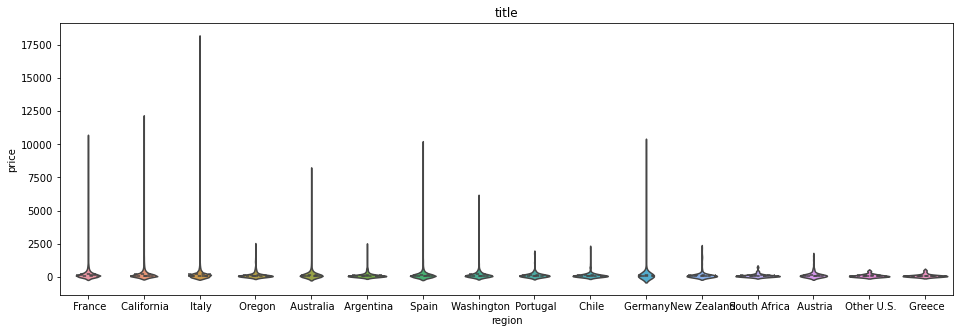

In [11]:
# Violin Plot
plt.figure(figsize = [16, 5])
plt.title('title');
sb.set_palette('husl', 9)
sb.violinplot(data=master, x='region', y='price', inner = 'quartile');

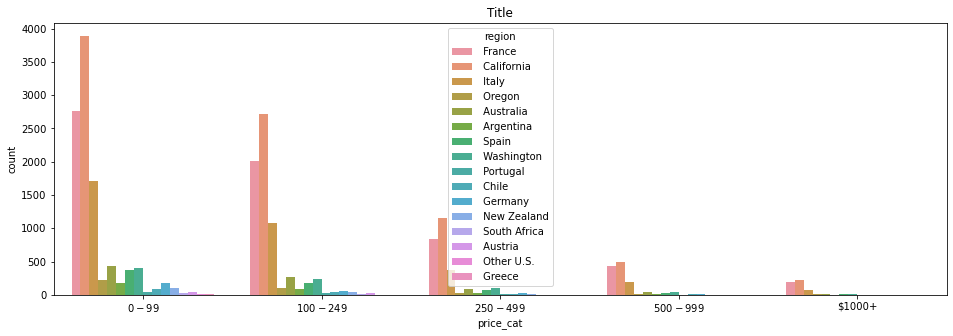

In [12]:
plt.figure(figsize = [16, 5])
plt.title('Title');
sb.set_palette('husl', 9)
sb.countplot(data=master, x='price_cat', hue='region');

How does year affect the price of the wine?

In [13]:
years = master[master['year'] > 1950]
years = years[years['year'] < 2020]

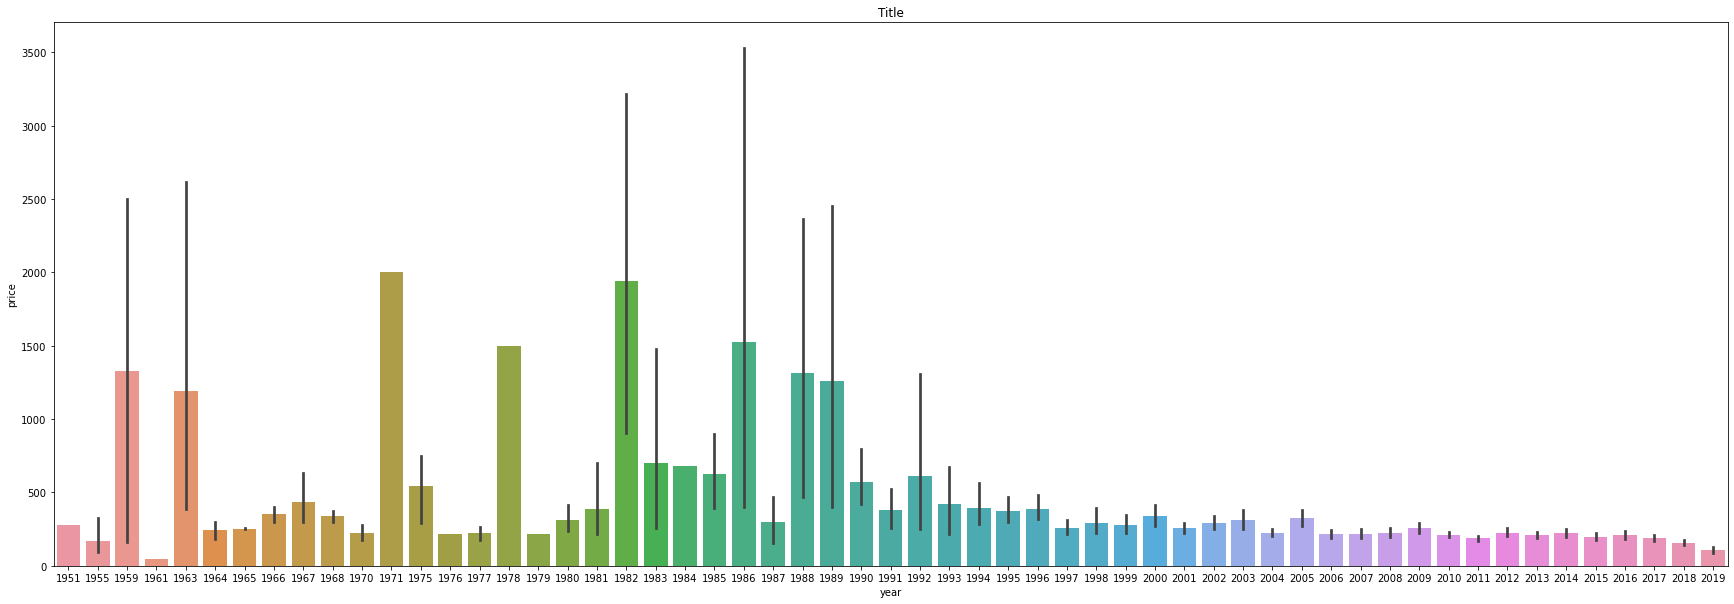

In [14]:
plt.figure(figsize = [30, 10])
plt.title('Title');
sb.set_palette('husl', 9)
sb.barplot(data=years, x="year", y="price");

### Region Exploration 

What are the top producting regions for the dataset?

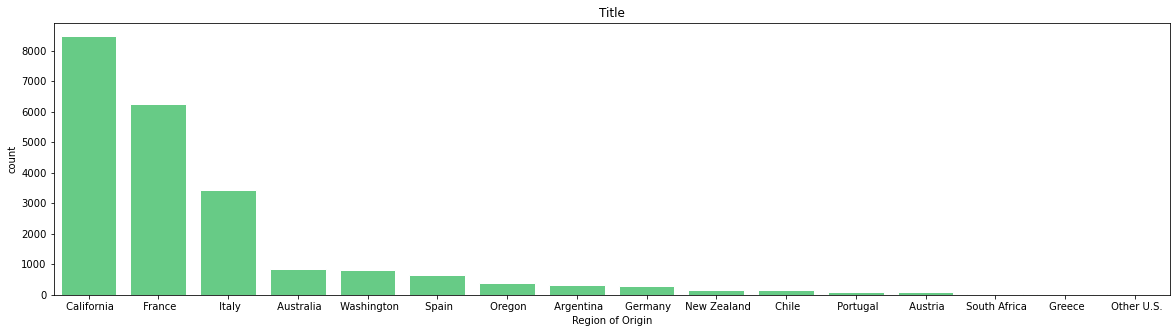

In [15]:
# standard-scaled plot of rates capacity
plt.figure(figsize = [20, 5])
plt.title("Title")
sb.countplot(data= master, x='region', color=green, edgecolor='white', order = master['region'].value_counts().index).set( xlabel = "Region of Origin");

Which region tend to get the highest ratings? Conversly, which region have low ratings?

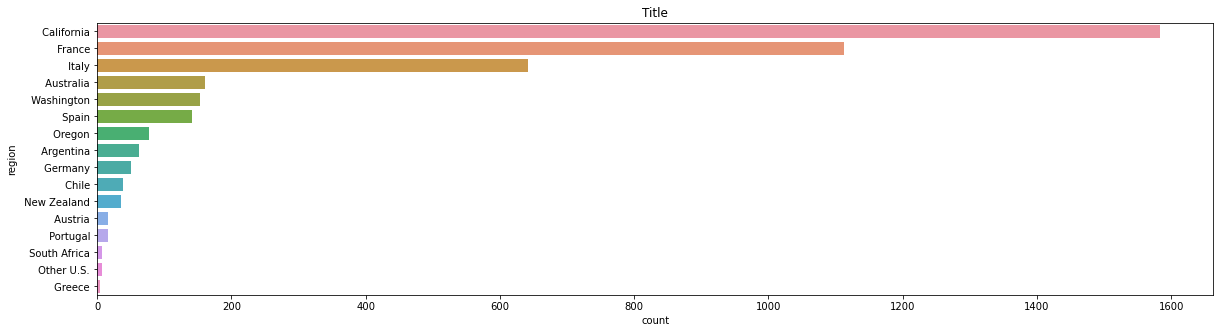

In [16]:
plt.figure(figsize = [20, 5])
plt.title('Title');
sb.set_palette('husl', 9)
sb.countplot(data=ratings, y='region', order = ratings['region'].value_counts().index);

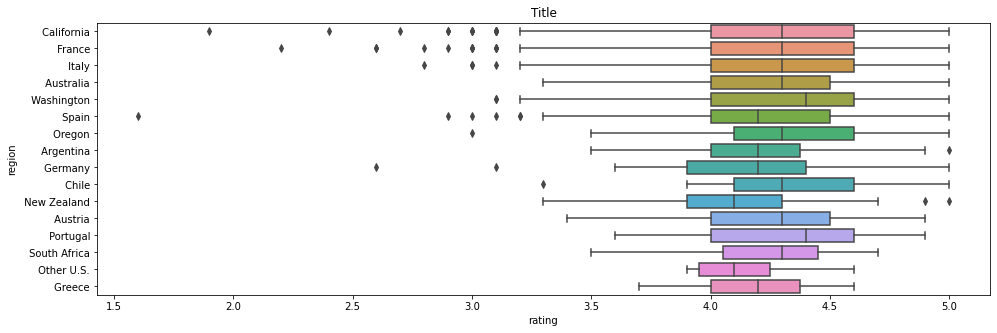

In [17]:
# Box Plot
plt.figure(figsize = [16, 5])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=ratings, x='rating', y='region', order = ratings['region'].value_counts().index);

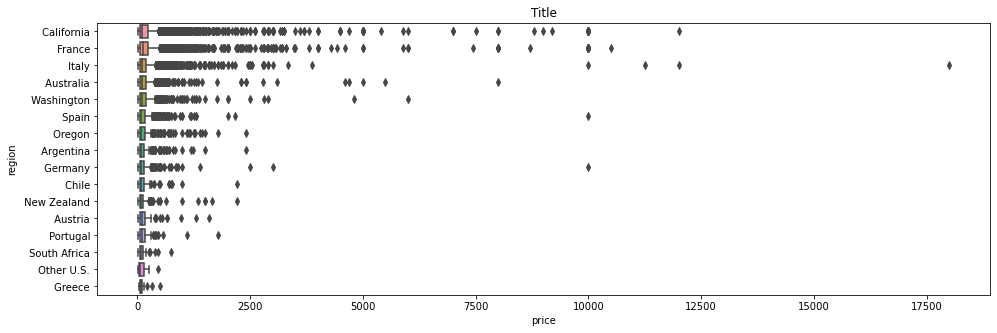

In [18]:
# Box Plot
plt.figure(figsize = [16, 5])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=master, x='price', y='region', order = ratings['region'].value_counts().index);

### Appellation Exploration

Which appelation tend to get the highest ratings? Conversly, which appellation have low ratings?

In [19]:
app_rate = ratings.groupby('rating')['appellation'].apply(lambda x: x.value_counts().index[0]).reset_index()
app_rate.head(5)

,rating,appellation
0,1.6,['Rioja']
1,1.9,['Napa Valley']
2,2.2,[' Bordeaux']
3,2.4,[' Central Coast']
4,2.6,[' Burgundy']


In [20]:
app_rate.tail(5)

,rating,appellation
24,4.6,[' Bordeaux']
25,4.7,[' Bordeaux']
26,4.8,['Napa Valley']
27,4.9,[' Napa Valley']
28,5.0,['Napa Valley']


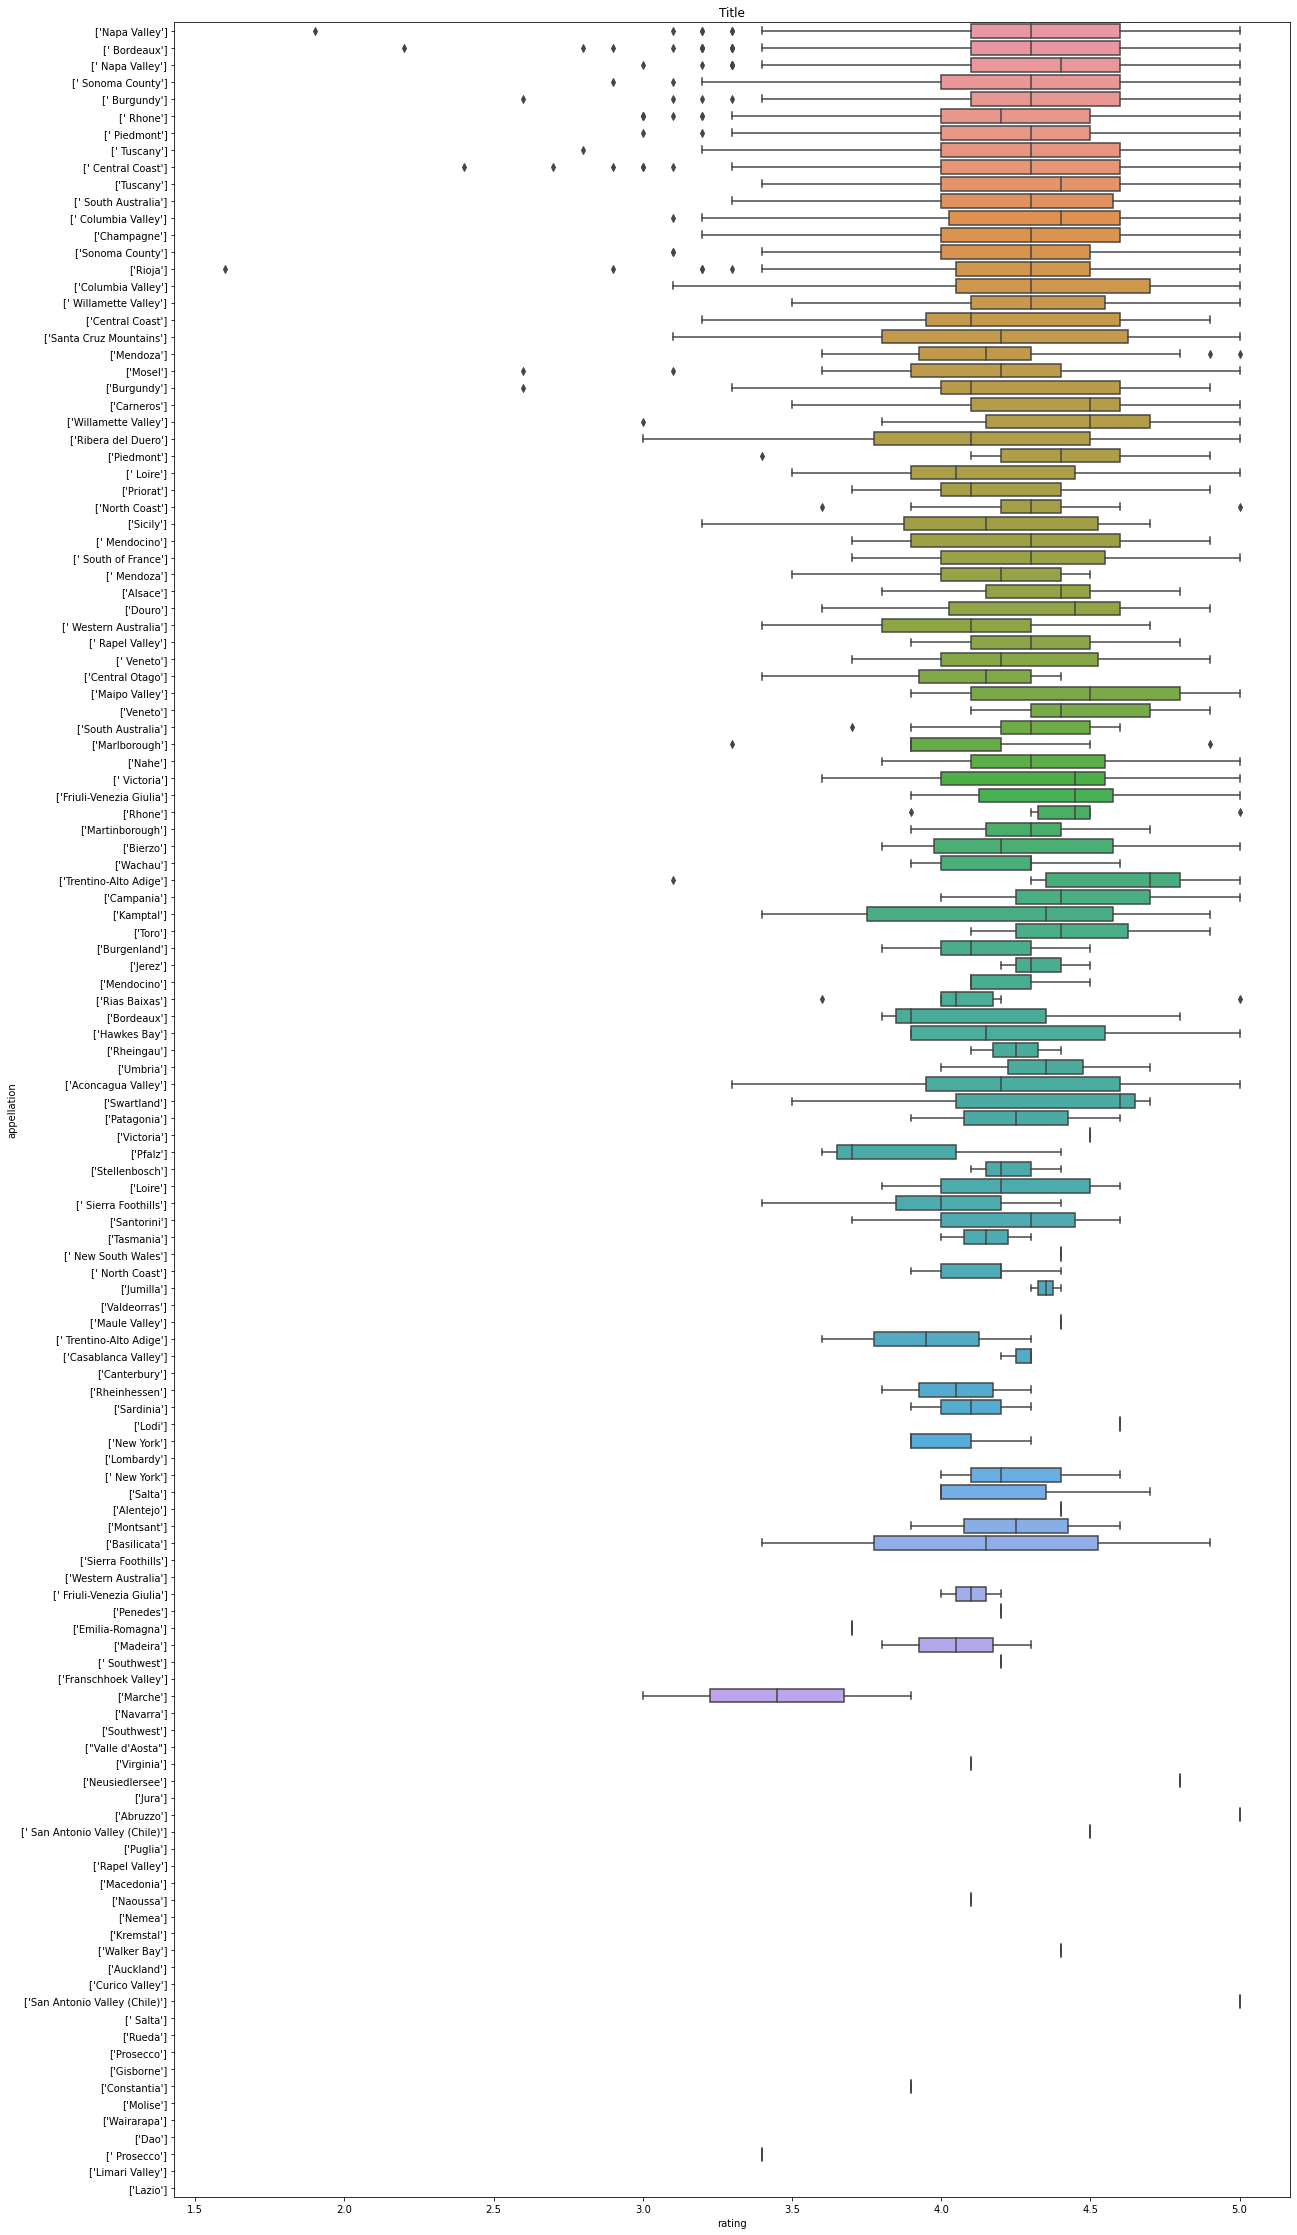

In [21]:
# Box Plot
plt.figure(figsize = [20, 40])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=ratings, y='appellation', x='rating', order = master['appellation'].value_counts().index);

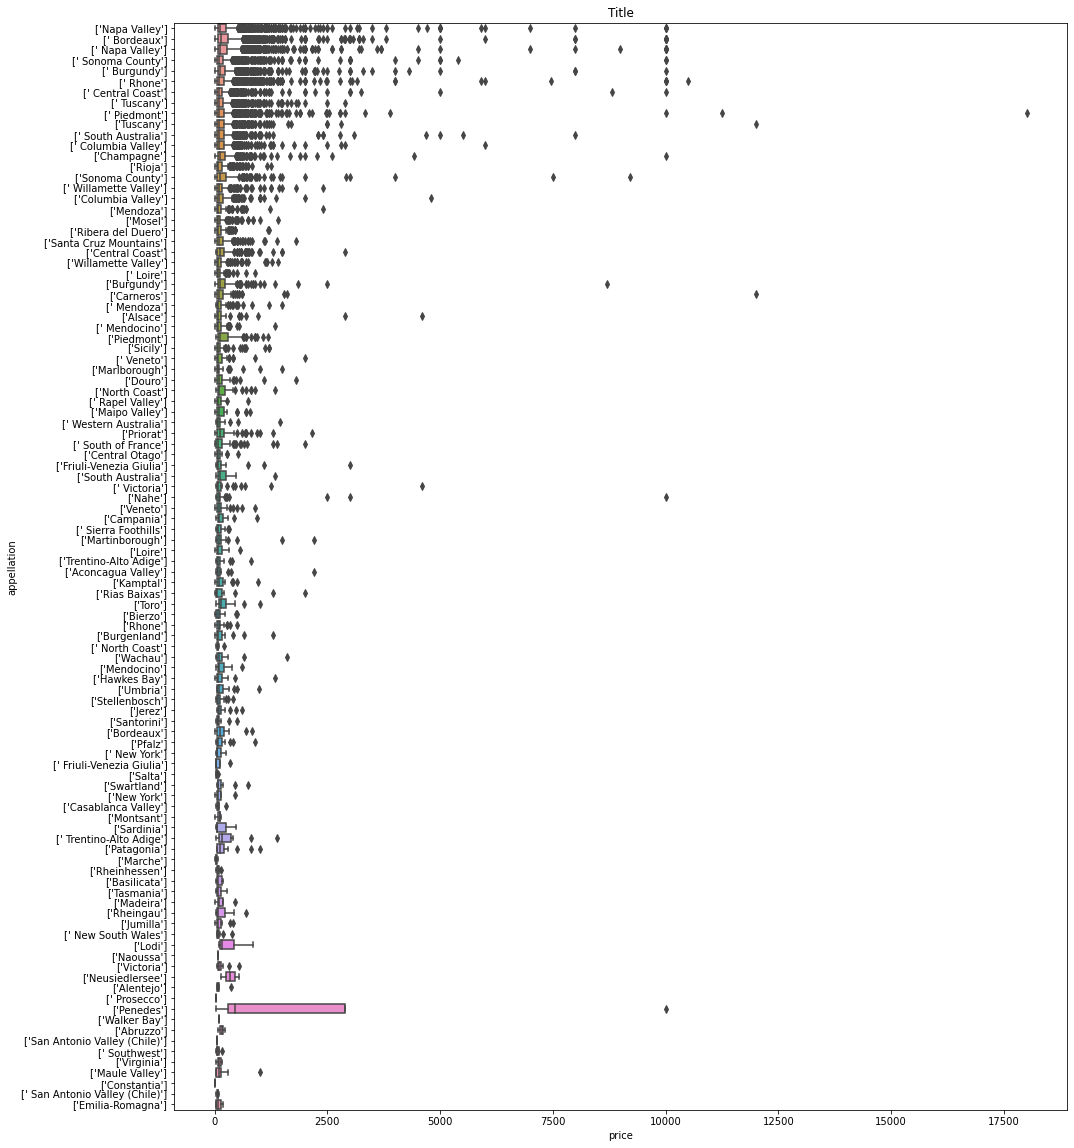

In [22]:
# Box Plot
plt.figure(figsize = [16, 20])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=master, x='price', y='appellation', order = ratings['appellation'].value_counts().index);

### Varietals Exploration 

Which varietals tend to get the highest ratings? Conversly, which varietals have low ratings?

In [23]:
var_rate = varietals.groupby('rating')['varietal'].apply(lambda x: x.value_counts().index[0]).reset_index()
var_rate

,rating,varietal
0,0.0,Bordeaux Red Blends
1,1.6,Sangiovese
2,1.9,Bordeaux Red Blends
3,2.2,Cabernet Franc
4,2.4,Sauvignon Blanc
5,2.6,Sangiovese
6,2.7,Furmint
7,2.8,Pinot Noir
8,2.9,Riesling
9,3.0,Chenin Blanc


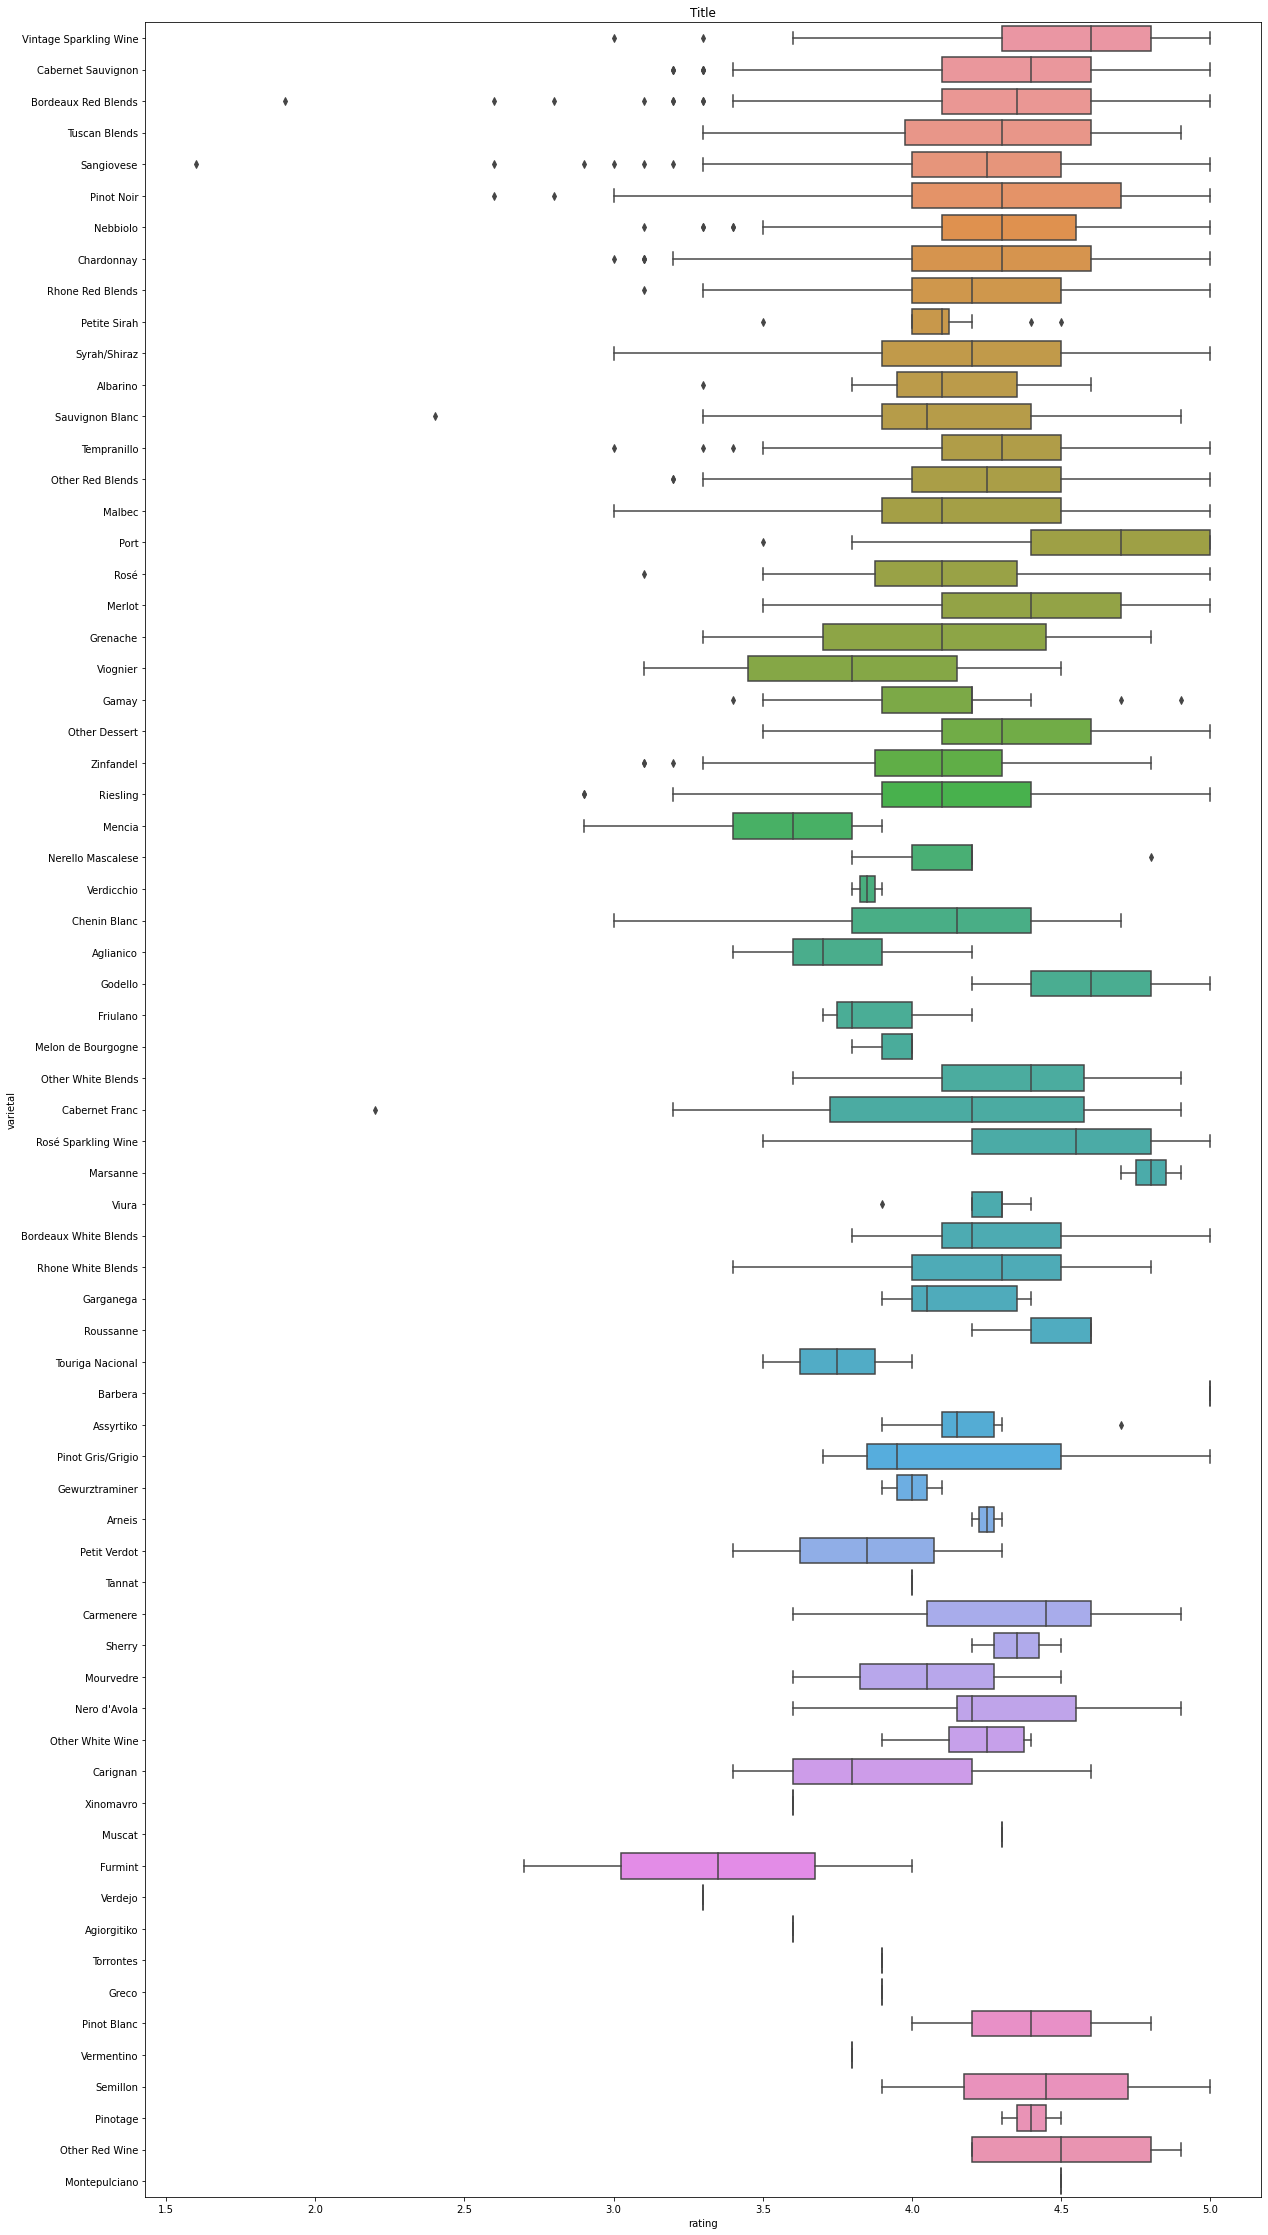

In [24]:
# Box Plot
plt.figure(figsize = [20, 40])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=ratings, y='varietal', x='rating');

Which varietal is the highest rated varietal for each region?

In [25]:
reg_var = varietals.groupby('region')['varietal'].apply(lambda x: x.value_counts().index[0]).reset_index()
reg_var

,region,varietal
0,Argentina,Pinot Noir
1,Australia,Bordeaux Red Blends
2,Austria,Bordeaux Red Blends
3,California,Bordeaux Red Blends
4,Chile,Bordeaux Red Blends
5,France,Bordeaux Red Blends
6,Germany,Pinot Noir
7,Greece,Pinot Noir
8,Italy,Cabernet Sauvignon
9,New Zealand,Pinot Noir


Which region is most common for each varietal?

In [26]:
varietals.groupby('varietal')['region'].apply(lambda x: x.value_counts().index[0]).reset_index()

,varietal,region
0,Agiorgitiko,New Zealand
1,Aglianico,California
2,Albarino,California
3,Alicante Bouschet,Spain
4,Arneis,California
...,...,...
77,Vermentino,France
78,Viognier,California
79,Viura,France
80,Xinomavro,Oregon


What is the ratings spread for each varietal?

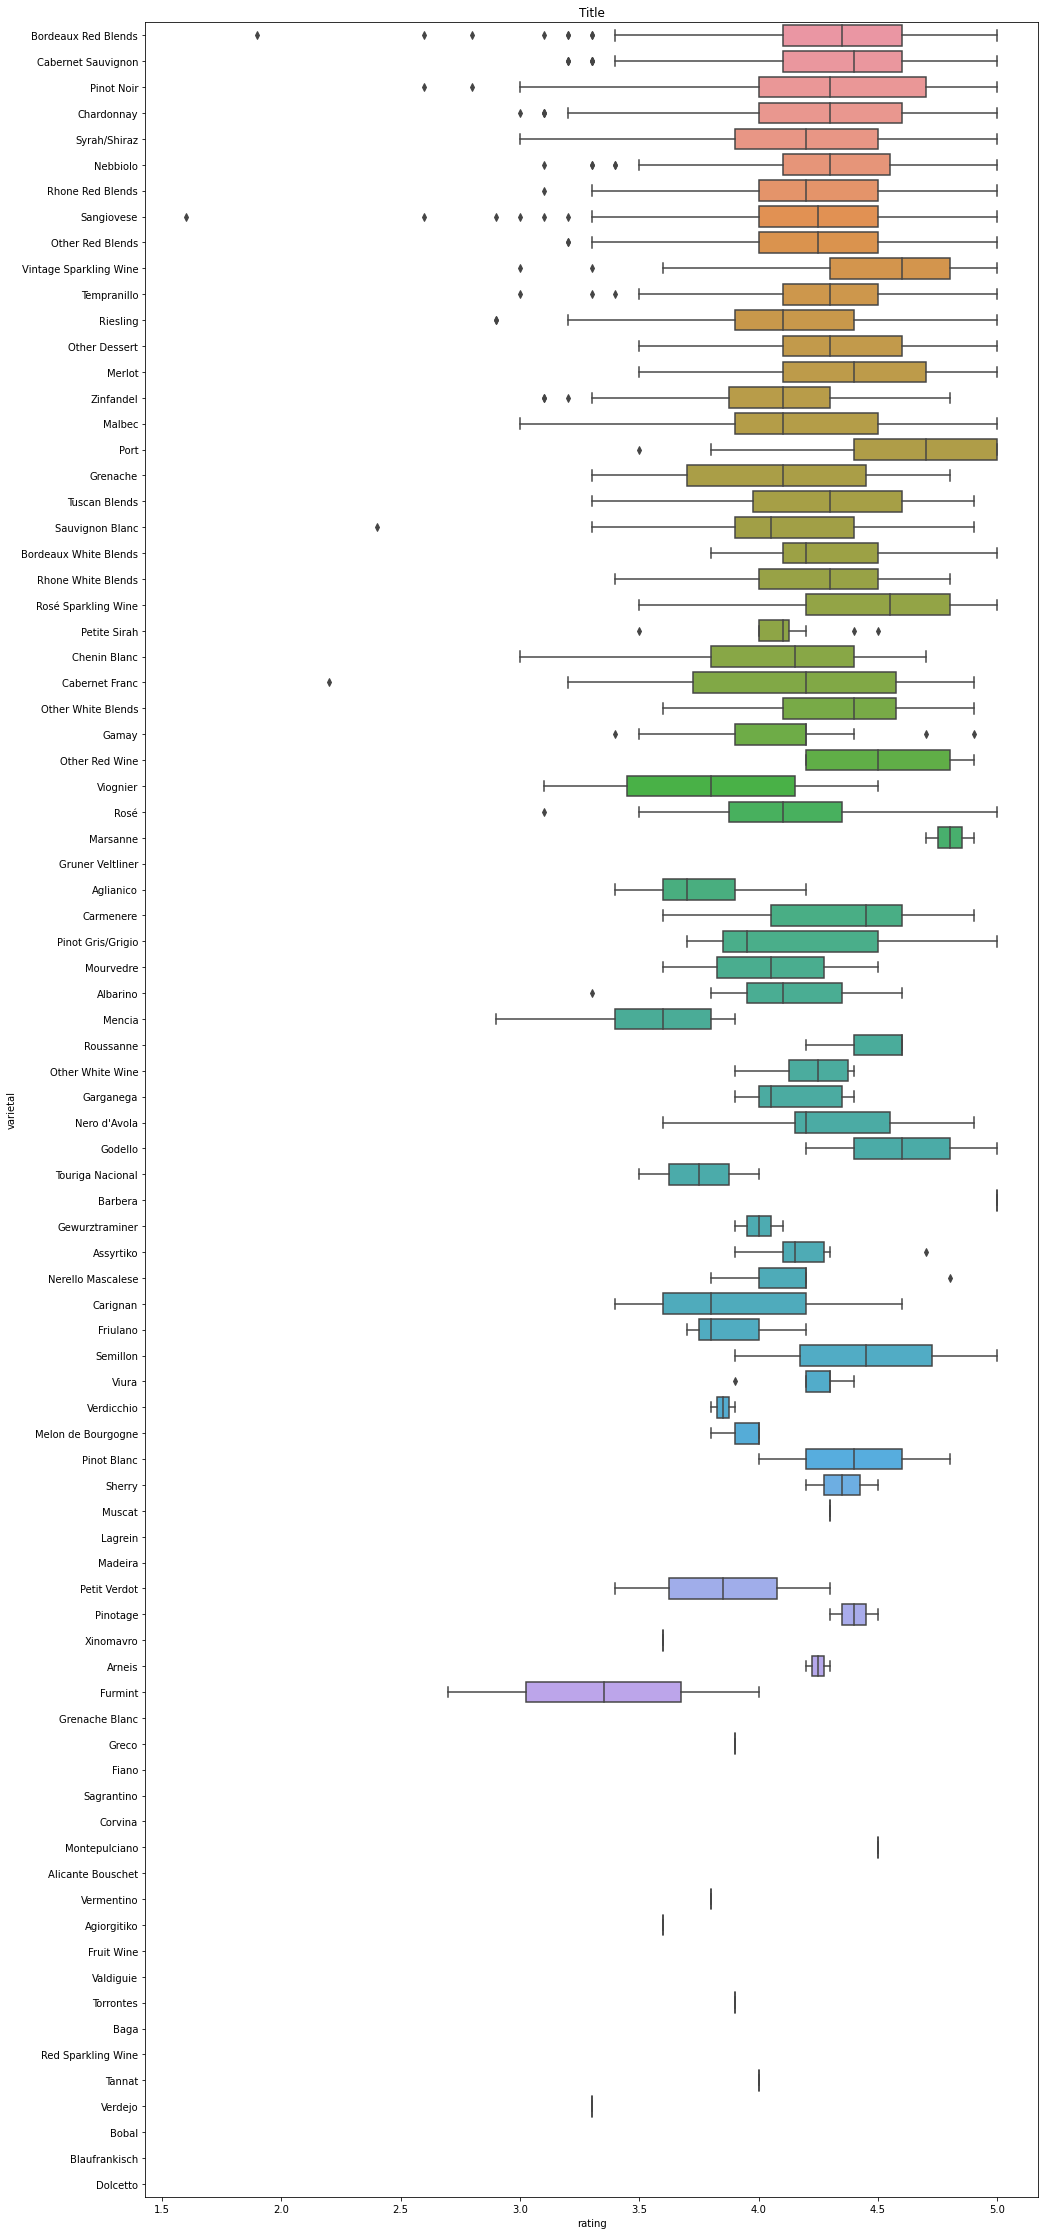

In [27]:
# Box Plot
plt.figure(figsize = [16, 40])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=ratings, y='varietal', x='rating', order = master['varietal'].value_counts().index);

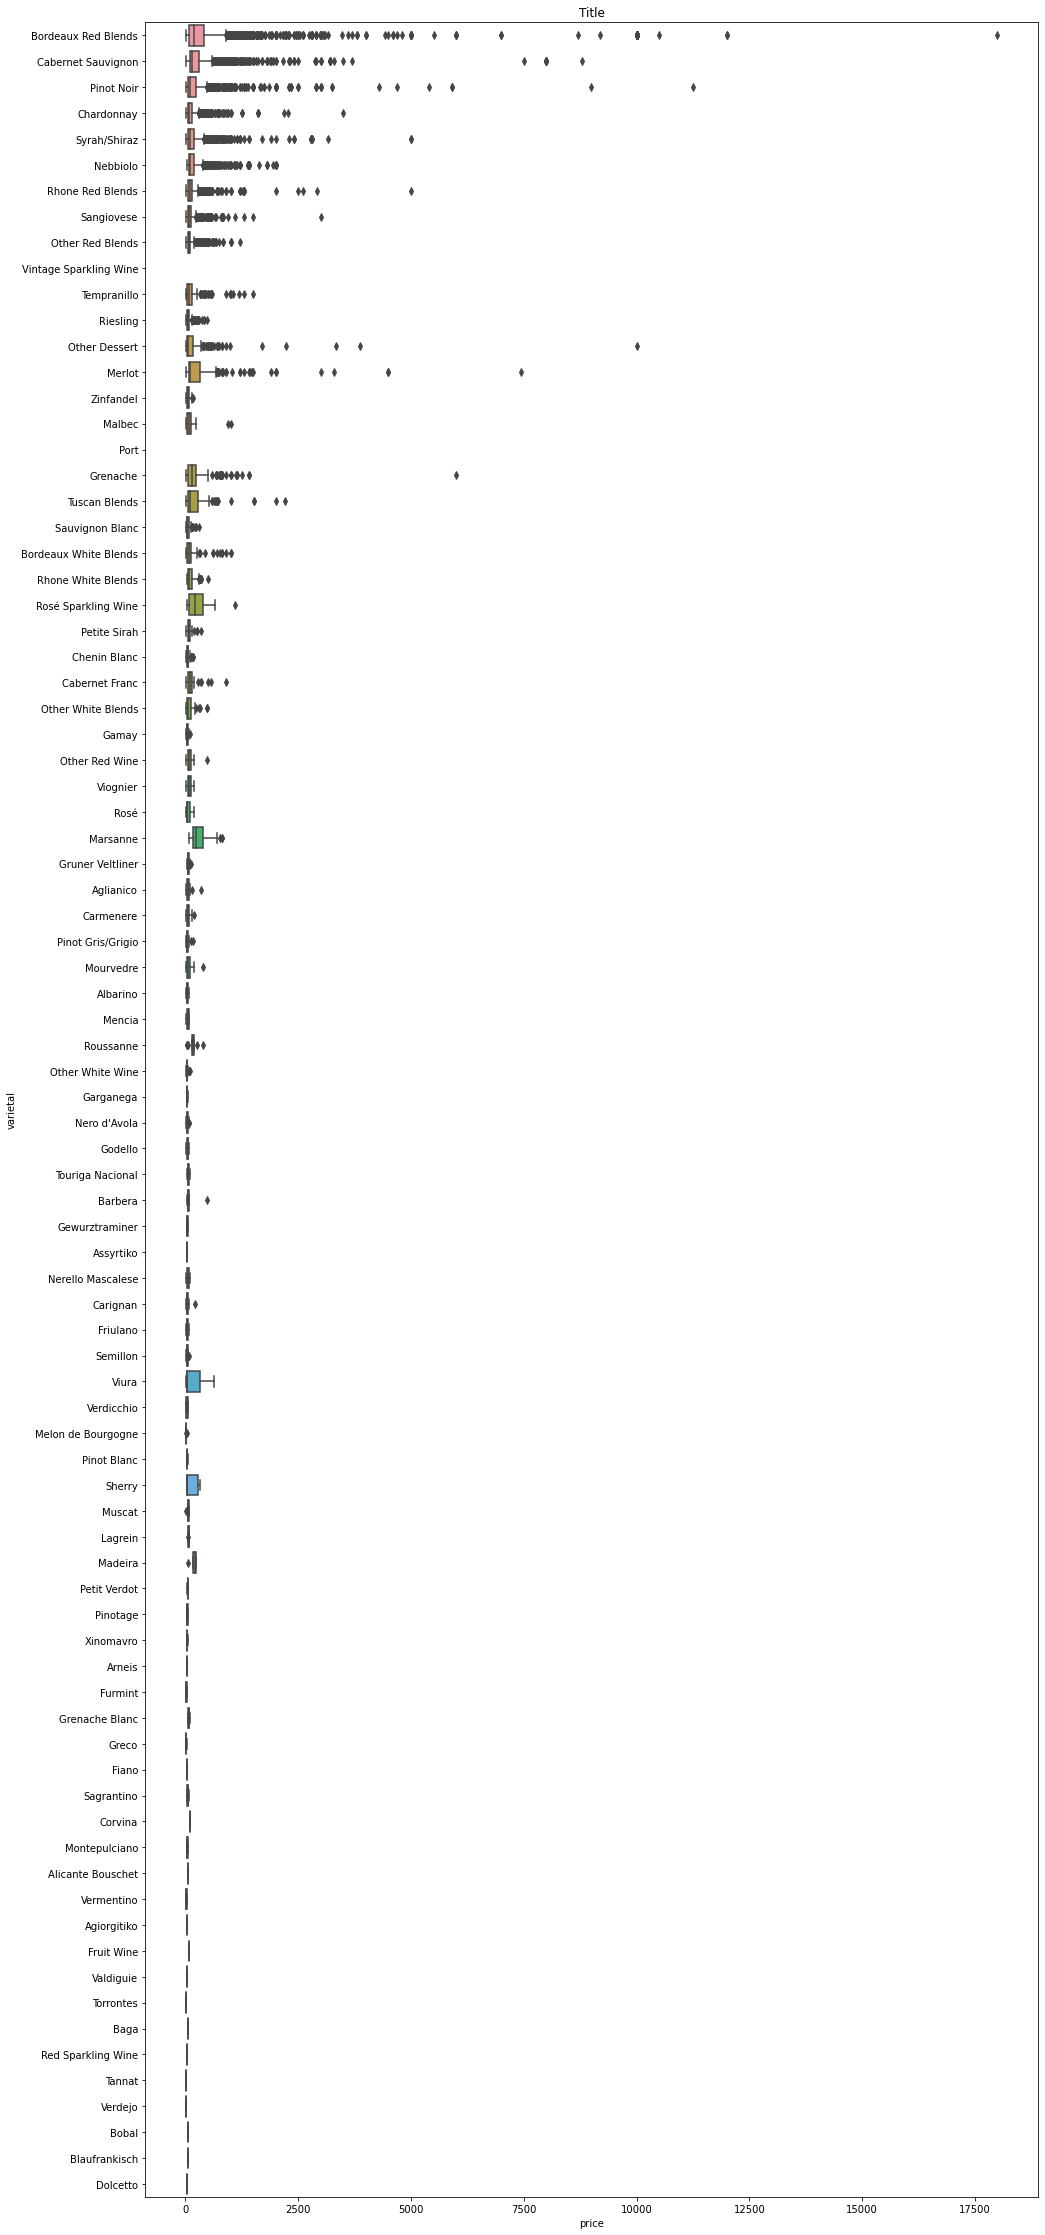

In [28]:
# Box Plot
plt.figure(figsize = [16, 40])
plt.title('Title');
sb.set_palette('husl', 9)
sb.boxplot(data=varietals, y='varietal', x='price', order = master['varietal'].value_counts().index);

## Deep dive into California wines

- Which CA wines have the highest ratings?
- How does year affect the ratings of the wine? Are there years to stay away from?
- How does price affect the ratings of the wine?